In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [2]:
script_list = []

with open('data/all_scripts.txt', 'r') as file:
    line = file.readline()
    season = 1
    episode = 1
    scene = ""
    while line:
        # Read the first word of each line, describe the line
        tokens = simple_tokeniser(line)
        # New episode
        if tokens[0] == ">>":
            season = int(tokens[2])
            episode = int(tokens[4])
        # New scene
        elif tokens[0] == ">":
            scene = ' '.join(tokens[1:])
        # New dialogue
        else:
            name = []
            i = 0
            while not tokens[i].endswith(':'):
                name.append(tokens[i])
                i += 1
            name.append(tokens[i].rstrip(':'))
            character = ' '.join(name)
            text = ' '.join(tokens[i+1:])
            script_list.append({'Season': season, 'Episode': episode, 'Scene': scene, 'Character': character, 'Text': text})
        # Read next line
        line = file.readline()

script = pd.DataFrame.from_dict(script_list)
print(script.shape)
script.head()

(51292, 5)


,Season,Episode,Scene,Character,Text
0,1,1,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
1,1,1,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,1,1,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
3,1,1,A corridor at a sperm bank.,Leonard,Excuse me?
4,1,1,A corridor at a sperm bank.,Receptionist,Hang on.


In [3]:
# Group by season and by episode
scenes = script.groupby(['Season', 'Episode']).agg('nunique')[['Scene']]
# Sum the nmber of scene by season
scenes_by_seasons = scenes.groupby('Season').agg('sum')
scenes_by_seasons

,Scene
Season,
1,157
2,205
3,193
4,219
5,198
6,211
7,207
8,191
9,177


In [4]:
script.Character.unique()

array(['Sheldon', 'Leonard', 'Receptionist', 'Penny', 'Howard', 'Raj',
       'Voice', 'Man', 'Lesley', 'Waitress', 'Summer', 'Gablehouser',
       'Mrs Cooper', 'All', 'Girl', 'Kurt', 'Howard’s phone', 'Christie',
       'Waiter', 'Howard’s Mother', 'Mrs Koothrappali', 'Together',
       'Lalita', 'Toby', 'Dennis', 'Leslie', 'Third Floor Janitor',
       'Mike', 'Missy', 'Leonard and Howard', 'Woman', 'Guy', 'Nurse',
       'Assistant', 'Eric', 'Gablehauser', 'Warrior', 'Penny-warrior',
       'DMV Lady', 'Ramona', 'Model', 'Phone rings. Answering machine',
       'Steph', 'Computer voice', 'David', 'Kripke', 'Beverley', 'Alicia',
       'Stuart', 'Michaela', 'Prof Crawley', 'Bethany', 'Sarah',
       'Tattooist', 'Prof Laughlin', 'Bernadette', 'Wil Wheaton', 'Ira',
       'Katee Sackhoff', 'Katee', 'Everyone', 'Abby', 'Martha',
       'Policeman', 'Woman on TV', 'Man on TV', 'Security Guard', 'Judge',
       'Guard', 'Stan Lee', 'Venkatesh', 'Wil', 'Elizabeth',
       'Mrs Wolowitz',

**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [5]:
# Group line by character and count the number of line said by each
dialogue_by_char = script.groupby('Character').agg('count')[['Text']].sort_values(by='Text', ascending=False)
# Keep only the reccurent character
recurrent_char = dialogue_by_char[dialogue_by_char.Text > 90]
print(recurrent_char.shape)
recurrent_char

(20, 1)


,Text
Character,
Sheldon,11689
Leonard,9829
Penny,7677
Howard,5872
Raj,4779
Amy,3472
Bernadette,2690
Stuart,733
Priya,222


Man is clearly the character to remove because all the other are named character.

In [6]:
recurrent_char = recurrent_char.index.to_list()
recurrent_char.remove('Man')
recurrent_char

['Sheldon',
 'Leonard',
 'Penny',
 'Howard',
 'Raj',
 'Amy',
 'Bernadette',
 'Stuart',
 'Priya',
 'Mrs Cooper',
 'Emily',
 'Beverley',
 'Mrs Wolowitz',
 'Zack',
 'Arthur',
 'Wil',
 'Leslie',
 'Kripke',
 'Bert']

In [7]:
# Keep the line in the scripts said only by reccurent characters
script = script[script.Character.isin(recurrent_char)]

## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [8]:
for exclude_char in EXCLUDE_CHARS:
    script.Text = script.Text.str.replace(exclude_char, ' ')
script.Text = script.Text.str.lower()
script

,Season,Episode,Scene,Character,Text
0,1,1,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...
1,1,1,A corridor at a sperm bank.,Leonard,agreed what s your point
2,1,1,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...
3,1,1,A corridor at a sperm bank.,Leonard,excuse me
5,1,1,A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov t...
...,...,...,...,...,...
51284,10,24,Sheldon’s office.,Sheldon,uh breakfast yes lunch no i did have a coug...
51286,10,24,Sheldon’s office.,Sheldon,how thoughtful thank you
51288,10,24,Sheldon’s office.,Sheldon,and i with you question are you seeking a ro...
51290,10,24,Sheldon’s office.,Sheldon,well that would raise a number of problems w...


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

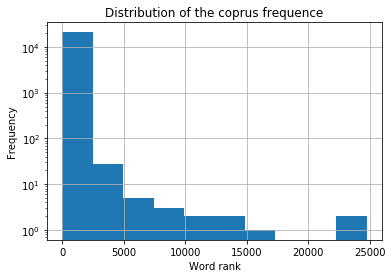

In [9]:
word_counts = dict()
words = script.Text.str.cat(sep=" ").split()

for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

word_counts = pd.Series(word_counts)
word_counts = word_counts.sort_values(ascending=False)
plt.figure()
word_counts.hist(log=True)
plt.title('Distribution of the coprus frequence')
plt.xlabel('Word rank')
plt.ylabel('Frequency')
plt.show()

We can see the usual corpus distribution, the common words are much more present that more specific words. For example the 5 most common words are : I, you, the, to, a which are present more than 10 000 times. The peak at the end represent all the words that are only present once in the corpus. The histogram need to have a logarithmic y axis in order to visualize the low frequency word. The x axis can be linear.

In [10]:
word_counts

i                  24764
you                22977
the                15110
to                 14295
a                  13518
                   ...  
omnidirectional        1
¿dónde                 1
servo                  1
está                   1
relation…              1
Length: 21102, dtype: int64

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [11]:
# Creat a new columns with the len of each line
word_count_char = script.copy()
word_count_char['Text_len'] = word_count_char.Text.str.len()

# Group by character and sum it
word_count_char_total = word_count_char.groupby('Character').agg('sum')[['Text_len']]
word_count_char_total = word_count_char_total.sort_values(by='Text_len', ascending=False)
word_count_char_total

,Text_len
Character,
Sheldon,951269
Leonard,496912
Penny,381131
Howard,338074
Raj,293203
Amy,199053
Bernadette,132563
Stuart,37787
Mrs Cooper,16621


The most talkative character is sheldon by far who prononce almost twice as much word as Leonard the second most talkative character. They are followed by penny howard and Raj. It's normal to see these character are the more talkative as they are the 5 principal characters

**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [12]:
# Group by character by episode
word_count_char_episode = word_count_char.groupby(['Character', 'Season', 'Episode']).agg('sum')[['Text_len']]
# Compute the mean words by character by episode where the character talk
word_count_char_episode = word_count_char_episode.groupby('Character').agg('mean')[['Text_len']]
# Sort values
word_count_char_episode = word_count_char_episode.sort_values(by="Text_len", ascending=False)
word_count_char_episode

,Text_len
Character,
Sheldon,4118.047619
Leonard,2151.134199
Beverley,2137.400000
Mrs Cooper,2077.625000
Arthur,1697.000000
Penny,1664.327511
Howard,1463.523810
Amy,1292.551948
Raj,1274.795652


1. We can see that Sheldon is still the most talkative character followed by Leaonard. But after them the order has changed, and people who appears in less episode are higher in the ranking while people appearing in a lot of episodes are lower ine the ranking.

2. Because we want to know which character is the most talkative or some character are not present during all the episodes. That's why we computed an average number of word per episode. We can further improve the analysis by taking the average number of word by scene.

In [13]:
# Group by character by scene
word_count_char_scene = word_count_char.groupby(['Character', 'Season', 'Episode' , 'Scene']).agg('sum')[['Text_len']]
# Compute the mean words by character by episode where the character talk
word_count_char_scene = word_count_char_scene.groupby('Character').agg('mean')[['Text_len']]
# Sort values
word_count_char_scene = word_count_char_scene.sort_values(by="Text_len", ascending=False)
word_count_char_scene

,Text_len
Character,
Sheldon,755.575060
Mrs Cooper,692.541667
Arthur,678.800000
Beverley,628.647059
Leonard,436.270413
Penny,434.584949
Amy,425.326923
Bert,421.692308
Wil,401.450000


We still have Sheldon as more talative character, so we can be pretty confident that he is the most talkative. But to measure how sure we will sample 10 times 30 scenes with replacement for each character and compute their mean number of word by scene. Then we can compute confidence interval for each of these means. We will compute 95% confidence inerval using :

$$
\mu \in [m - t_{1-\frac{\alpha}{2}}\frac{s}{\sqrt{n}} ; m + t_{1-\frac{\alpha}{2}}\frac{s}{\sqrt{n}}]
$$



In [14]:
# Group by character by scene
word_count_char_scene = word_count_char.groupby(['Character', 'Season', 'Episode' , 'Scene']).agg('sum')[['Text_len']]
word_count_char_scene = word_count_char_scene.groupby('Character')

means = pd.DataFrame(index=word_count_char_total.index)
for i in range(40):
    sample = word_count_char_scene.apply(lambda x : x.sample(30, replace=True)).groupby('Character').agg('mean')
    means[i] = sample['Text_len']

<Figure size 432x288 with 0 Axes>

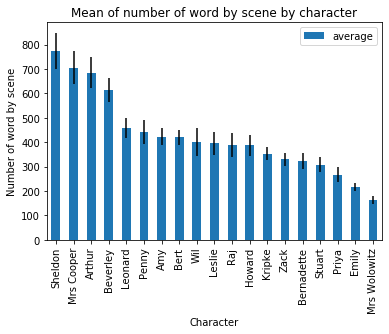

In [15]:
from scipy import stats

def confidence_interval(x):
    values = []
    for col in means.columns:
        values.append(x[col])
    mean = np.mean(values)
    std = np.std(values)
    n = len(values)
    t = stats.t.ppf(1-0.025, n)
    confidence = t * std / np.sqrt(n)
    return confidence

talking_bootstraped = pd.DataFrame(means.mean(axis=1), columns=["average"])
talking_bootstraped['confidence'] = 2 * means.apply(confidence_interval, axis=1)
talking_bootstraped = talking_bootstraped.sort_values(by='average', ascending=False)
talking_bootstraped = talking_bootstraped.reset_index()
plt.figure()
talking_bootstraped.plot(kind="bar", x="Character", y="average", yerr=talking_bootstraped['confidence'].to_numpy())
plt.title("Mean of number of word by scene by character")
plt.xlabel("Character")
plt.ylabel("Number of word by scene")
plt.show()

Now it's not as clear as before that sheldon is the most talkative character. Because it's confidence interval overlaps with Mrs Cooper and Arthur. 

### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

In [16]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
                                   ('spark.executor.memory', '12g'),  # find
                                   ('spark.driver.memory','4g'), # your
                                   ('spark.driver.maxResultSize', '2G') # setup
                                  ])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

# read the input file line by line
text_file = sc.textFile("data/all_scripts.txt")

In [17]:
def get_speaker(line):
    words = line.split()
    if(words[0] == '>>' or words[0] == '>'):
        return (">>", " ")
    speaker = []
    i = 0
    while not words[i].endswith(':'):
        speaker.append(words[i])
        i += 1
        
    speaker.append(words[i].rstrip(':'))
    return (' '.join(speaker), ' '.join(words[i+1:]))

lines_rdd = text_file.map(get_speaker).filter(lambda x : x[0] in recurrent_char)

In [18]:
import re
# regex to get one word
word_regex = re.compile(r'\w+')

# We need first a vocabulary
def get_line_words(line):
    return word_regex.findall(line.lower())

# count the words and sort in descending order
vocabulary_rdd = text_file.flatMap(get_line_words).map(lambda word: (word, 0)).reduceByKey(lambda a, b: a + b).map(lambda x : x[0])
voabulary = vocabulary_rdd.collect()

IllegalArgumentException: 'Unsupported class file major version 56'

In [19]:
from scipy.sparse import csr_matrix

# Define the function which associate a BoW to each line
def bag_of_word(x, vocabulary):
    bow = csr_matrix((1, len(vocabulary)))
    for word in word_regex.findall(x[1].lower()):
        index = vocabulary.index(word)
        bow[0, index] += 1
    return (x[0], bow)

if False:
    bow_speaker = lines_rdd.map(lambda x: bag_of_word(x, voabulary)).reduceByKey(lambda a, b: a+b).collect()

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [20]:
# Remove characters whose name are not single word 
for name in recurrent_char:
    if len(name.split()) > 1:
        recurrent_char.remove(name)

In [21]:
# familiarity graph
adjacency_familiarity = np.zeros(shape=(len(recurrent_char), len(recurrent_char)))
people_in_scene = script[script.Character.isin(recurrent_char)].groupby(['Season', 'Episode', 'Scene'])['Character'].apply(lambda x : list({y for y in x}))
people_in_scene

Season  Episode  Scene                                  
1       1        A corridor at a sperm bank.                                               [Sheldon, Leonard]
                 All five in Leonard’s car.                                 [Sheldon, Leonard, Howard, Penny]
                 Back at the apartment.                                                       [Howard, Penny]
                 In the bathroom.                                                            [Leonard, Penny]
                 Inside Sheldon and Leonard’s apartment.               [Sheldon, Leonard, Raj, Howard, Penny]
                                                                                  ...                        
10      24       The apartment.                             [Sheldon, Howard, Leonard, Raj, Amy, Bernadett...
                 The cafeteria.                                               [Sheldon, Leonard, Howard, Raj]
                 The comic book store.                         

In [22]:
people_in_scene

Season  Episode  Scene                                  
1       1        A corridor at a sperm bank.                                               [Sheldon, Leonard]
                 All five in Leonard’s car.                                 [Sheldon, Leonard, Howard, Penny]
                 Back at the apartment.                                                       [Howard, Penny]
                 In the bathroom.                                                            [Leonard, Penny]
                 Inside Sheldon and Leonard’s apartment.               [Sheldon, Leonard, Raj, Howard, Penny]
                                                                                  ...                        
10      24       The apartment.                             [Sheldon, Howard, Leonard, Raj, Amy, Bernadett...
                 The cafeteria.                                               [Sheldon, Leonard, Howard, Raj]
                 The comic book store.                         

In [23]:
def familiarity_graph_one_scene(x, recurrent_char):
    adjacency_familiarity = np.zeros(shape=(len(recurrent_char), len(recurrent_char)))
    for i in range(len(x)-1):
        index1 = recurrent_char.index(x[i])
        for j in range(i+1, len(x)):
            index2 = recurrent_char.index(x[j])
            adjacency_familiarity[index1, index2] = 1
            adjacency_familiarity[index2, index1] = 1
    return adjacency_familiarity

In [24]:
familiarity_adj = people_in_scene.apply(familiarity_graph_one_scene, args=(recurrent_char,)).sum()

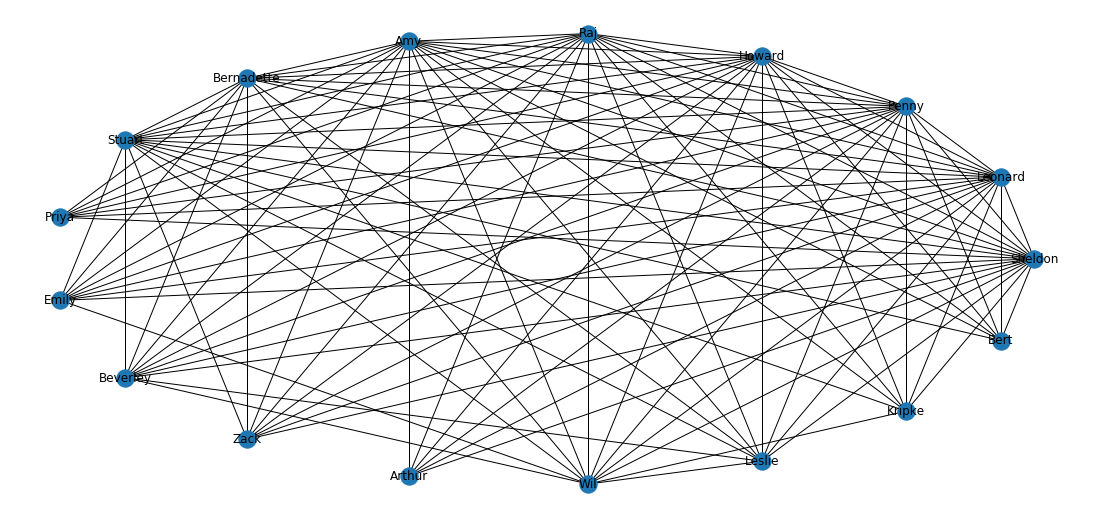

In [25]:
import networkx as nx

familiarity_graph = nx.from_numpy_matrix(familiarity_adj)
plt.figure(figsize=(15,7))
nx.draw_circular(familiarity_graph, labels={i:x for i,x in enumerate(recurrent_char)})
plt.show()

In [26]:
# Gossip Graph

# First merge the people present in the scene with the line script
people_in_scene = people_in_scene.reset_index().rename(columns={'Character' : 'Character present'})
script_with_present_char = pd.merge(script[script.Character.isin(recurrent_char)], people_in_scene, left_on=['Season', 'Episode', 'Scene'], right_on=['Season', 'Episode', 'Scene'])

In [27]:
def gossip_adj_one_line(line, recurrent_char):
    adjacency_gossip = np.zeros(shape=(len(recurrent_char), len(recurrent_char)))
    index1 = recurrent_char.index(line['Character'])
    possible_gossip = [x.lower() for x in recurrent_char if x not in line['Character present']]
    gossip = [char for char in line['Text'].split() if char in possible_gossip]
    
    for char in gossip:
        index2 = recurrent_char.index(char.capitalize())
        adjacency_gossip[index1, index2] = 1
    return adjacency_gossip

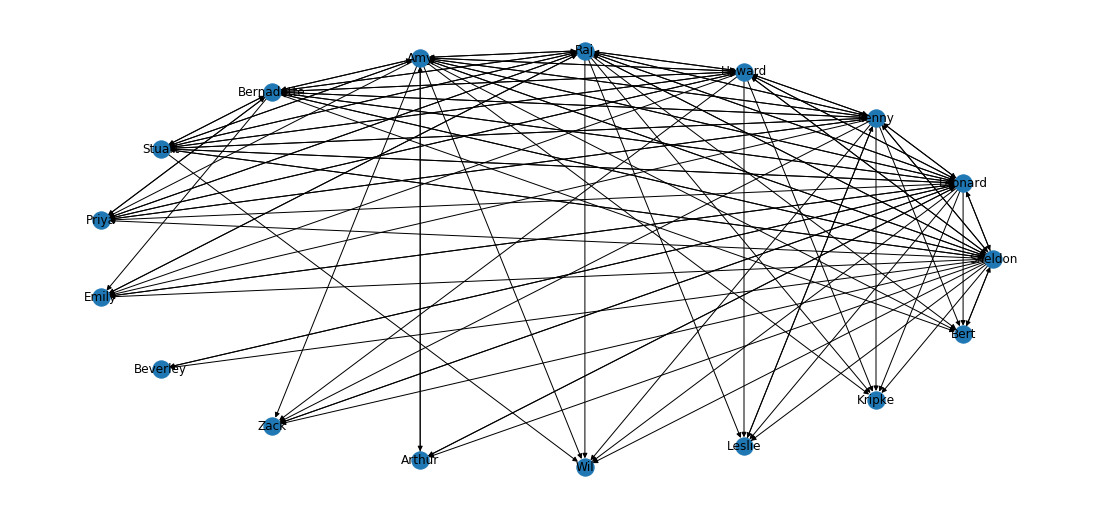

In [28]:
gossip_adj = script_with_present_char.apply(gossip_adj_one_line, args=(recurrent_char,), axis=1).sum()
gossip_graph = nx.from_numpy_matrix(gossip_adj, create_using=nx.MultiDiGraph())
plt.figure(figsize=(15,7))
nx.draw_circular(gossip_graph, labels={i:x for i,x in enumerate(recurrent_char)})
plt.show()

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

In [29]:
from networkx.algorithms.shortest_paths.generic import shortest_path_length
lengths = shortest_path_length(familiarity_graph)
max_length = 0
for i, length_to_all in lengths:
    if max(length_to_all.values()) > max_length:
        max_length = max(length_to_all.values())
print("Longuest Short path has a length of", max_length)

Py4JError: An error occurred while calling z:org.apache.spark.sql.functions.max. Trace:
py4j.Py4JException: Method max([class java.util.ArrayList]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:339)
	at py4j.Gateway.invoke(Gateway.java:276)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:835)



Sheldon is wrong, every charcater is familiar with everyone else through at most 2 intermediary

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [30]:
from networkx.algorithms.centrality import betweenness_centrality

centrality = betweenness_centrality(familiarity_graph)
max_centrality = max(centrality.values())
most_central_nodes = [k for k in centrality if centrality[k] == max_centrality]
most_central_char = [char for i, char in enumerate(recurrent_char) if i in most_central_nodes]
print("The charater(s) through whom the the largest number of these indirect familiarities happen is(are) ", most_central_char)

Py4JError: An error occurred while calling z:org.apache.spark.sql.functions.max. Trace:
py4j.Py4JException: Method max([class java.util.ArrayList]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:339)
	at py4j.Gateway.invoke(Gateway.java:276)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:835)



**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

The claim of sheldon correspond to the strongly complete property of the graph. It is true only if all entry of the adjacency matrix are different from 0.

In [31]:
np.min(gossip_adj)

0.0

As we can see, the minimum value of the adjacency matrix is 0. Then we can conclude that the graph is not strongly complete. The other property is that the network is weakly complete, if when we transform the graph from a directed graph to a undirected graph, the matrix do ot contains 0 anymore. It is not the case here.

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

We need to turn out the directed gossip graph into a undirected graph. Then the property is equivalent to check : there is an edge in the gossip graph if and only if there is the same edge in the familiarity graph.

In [32]:
# Transform gossip graph into a undirected graph
gossip_graph_undirected = gossip_graph.to_undirected()

gossip_edges = list(gossip_graph_undirected.edges())
familiarity_edges = list(familiarity_graph.edges())

only_gossip = [edge for edge in gossip_edges if edge not in familiarity_edges]
only_familiarity = [edge for edge in familiarity_edges if edge not in gossip_edges]

if len(only_gossip) + len(only_familiarity) > 0:
    print("The propostion : 'for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other' is FALSE")
else:
    print("The propostion : 'for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other' is TRUE")

The propostion : 'for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other' is FALSE


## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [33]:
# First split the training and testing set
training = script[script.Season <= 8]
testing = script[script.Season > 8]
print(training.shape)
print(testing.shape)

(38177, 5)
(10169, 5)


In [34]:
# Load stop words
stopwords = np.loadtxt('helpers/stopwords.txt', dtype=str).tolist()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=simple_tokeniser, stop_words=stopwords)

**training**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [36]:
sheldon_lines = training[training.Character == "Sheldon"]
others_lines = training[training.Character != "Sheldon"]

sheldon_vocabulary = vectorizer.fit(sheldon_lines.Text).vocabulary_.keys()
other_vocabulary = vectorizer.fit(others_lines.Text).vocabulary_.keys()

only_sheldon = [x for x in sheldon_vocabulary if x not in other_vocabulary]
len(only_sheldon)

5269

In [ ]:
testing_vocab = testing.copy()

def predict_sheldon(line, vocab, stopwords):
    text = simple_tokeniser(line['Text'])
    text = [x for x in text if x not in stopwords]
    if line['Character'] == "Sheldon":
        true = "Sheldon"
    else:
        true = "Other"
        
    predicted = "Other"
    for word in text:
        if word in vocab:
            predicted = "Sheldon"
    line["Predicted"] = predicted
    line["Score"] = true == predicted
    return line

results = testing_vocab.apply(predict_sheldon, args=(only_sheldon, stopwords), axis=1)

In [ ]:
accuracy = len(results[results.Score])/len(results)
precision = len(results[(results.Score) & (results.Character == "Sheldon")])/len(results[results.Predicted == "Sheldon"])
recall = len(results[(results.Score) & (results.Character == "Sheldon")])/len(results[results.Character == "Sheldon"])
print("The accuracy is {:.3f}, the precision {:.3f} and the recall {:.3f}".format(accuracy, precision, recall))

The precision is good but the accuracy and the recall are quite low. 

**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=25)

X_train = svd.fit_transform(vectorizer.fit_transform(training.Text))
y_train = [1 if x == "Sheldon" else 0 for x in training.Character]
X_test = svd.fit_transform(vectorizer.fit_transform(testing.Text))
y_test = [1 if x == "Sheldon" else 0 for x in testing.Character]

In [ ]:
# fit the model
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=10)
model.fit(X_train, y_train)

# Make the prediction
y_pred = model.predict(X_train)

In [ ]:
# create the confusion matrix 
TP = 0
TN = 0
FP = 0 
FN = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        if y_train[i] == 1:
            TP += 1
        else:
            FP += 1
    else:
        if y_train[i] == 1:
            FN += 1
        else:
            TN += 1

accuracy = (TP + TN)/len(y_pred)
precision_sheldon = TP / (TP+FP)
recall_sheldon = TP / (TP+FN)
precision_other = TN / (TN + FP)
recall_other = TN / (TN + FN)

In [ ]:
accuracy

In [ ]:
precision_sheldon

In [ ]:
recall_sheldon

In [ ]:
precision_other

In [ ]:
recall_other

Precision and recall are quite low for sheldon's lines while they are higher for the "other" class. It's because the "other" class contains way more lines that sheldon's class. 

In [ ]:
model.coef_

In [ ]:
svd.fit(vectorizer.fit_transform(training.Text))
first_component = abs(svd.components_[1])
vocabulary = vectorizer.get_feature_names()

In [ ]:
zipped = zip(vocabulary, first_component)
sorted_importance = sorted(zipped, key=lambda x: x[1])

In [ ]:
sorted_importance[-5:]